<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/01_ROC_AUC_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Scikit-learnで決定木での分類結果をROC曲線とAUCで評価する

### https://www.superi.jp/entry/2016/07/11/013215

In [0]:
# scikit-learn付属のirisデータを読み込み
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data,iris.target)
score = clf.score(iris.data,iris.target)

In [9]:
# classification_report のクラスの読み込み
from sklearn import metrics as mtr

# 予測
y_pred =clf.predict(iris.data)

# 分類結果の表示
print(mtr.classification_report(iris.target,y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [0]:
prob = clf.predict_proba(iris.data)[:,2]
fpr, tpr, thresholds = mtr.roc_curve(iris.target, prob, pos_label=2)

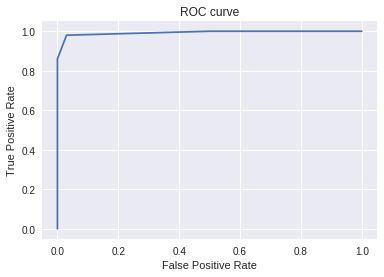

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [15]:
mtr.auc(fpr, tpr)

0.9929